<a href="https://colab.research.google.com/github/faisalfaturohman/Mall-Customer-Segmentation-Using-Clustering/blob/main/Mall_Customer_Segmentation_Using_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# Import Library

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import warnings 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
from sklearn.cluster import KMeans

# **Import Dataset**

In [3]:
df_mall=pd.read_csv('https://raw.githubusercontent.com/faisalfaturohman/Mall-Customer-Segmentation-Using-Clustering/main/Mall_Customers.csv')
df_mall.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Dataset yang digunakan merupakan data pelanggan Mall berdasarkan pendapatan (Annual Income), Skor Pengeluaran (Spending Score), Umur (Age), Jenis Kelamin (Gender), dan Customer ID.


> 


Data tersebut dapat digunakan untuk melakukan segmentasi pada data. 

In [4]:
df_mall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Melakukan perubahan nama agar lebih mudah ketika memanggil variabel

In [5]:
df_mall.rename(index=str, columns={'Annual Income (k$)': 'Income',
                              'Spending Score (1-100)': 'Score'}, inplace=True)
df_mall.head()

,CustomerID,Gender,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Melihat data secara detail menggunakan pairplot.

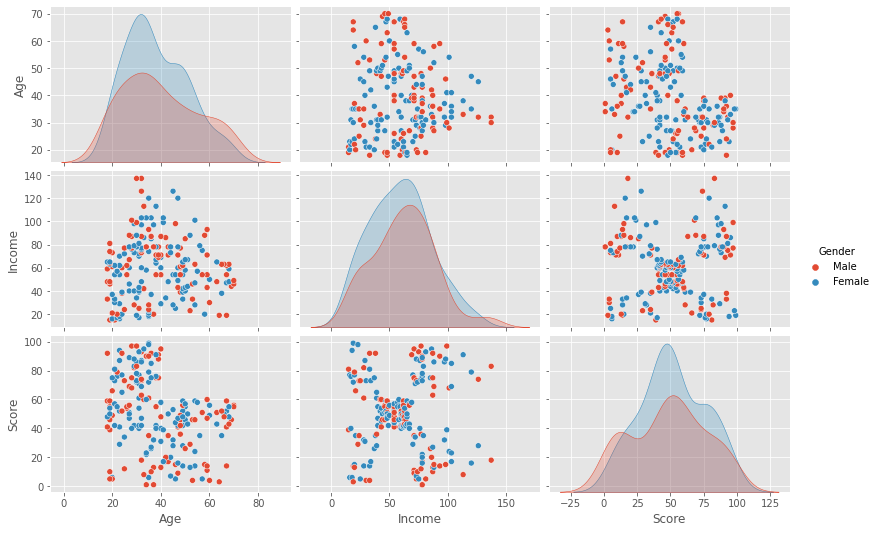

In [6]:
X = df_mall.drop(['CustomerID', 'Gender'], axis=1)
sns.pairplot(df_mall.drop('CustomerID', axis=1), hue='Gender', aspect=1.5)
plt.show()

Berdasarkan plot diatas Umur (Age) tidak berpengaruh terhadap segmentasi pelanggan karena tidak berhubungan secara langsung, oleh karena itu bisa di drop dan lebih menggunakan variabel / fitur yang lain.

# **K-Means Clustering**

K-Means Clustering adalah suatu metode penganalisaan data atau metode Data Mining yang melakukan proses pemodelan tanpa supervisi (unsupervised) dan merupakan salah satu metode yang melakukan pengelompokan data dengan sistem partisi.

## **Mencari Jumlah Cluster yang paling optimal**

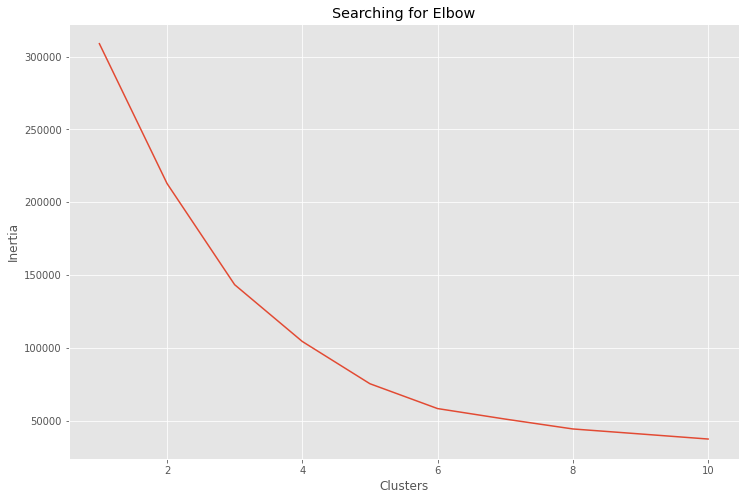

In [10]:
clusters = []

for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

plt.show()